# (Personalised) PageRank

## Requirements
* download and install [Snap.py](https://snap.stanford.edu/snappy/release/)
* If you downloaded the python3.6 Anaconda -> [create a Python 2 environment in Anaconda](http://stackoverflow.com/questions/24405561/how-to-install-2-anacondas-python-2-7-and-3-4-on-mac-os-10-9):
    * [to create]: conda create -n python2 python=2.7 anaconda
    * [to activate]: source activate python2

## Explanation
* **nodes_to_disambiguate** contains the nodes to disambiguate
* **nodes2candidates** contains a mapping from a node to its candidates

In [1]:
import snap

In [2]:
import wn_utils
import snap_utils
from nltk.corpus import wordnet as wn
from IPython.display import Image

## Extract info from WordNet

In [3]:
edges = wn_utils.load_wn_edges(categories={'hyponym_hypernym', 
                                           #'meronym_holonym',
                                           #'others'
                                          })

## Load graph into Snappy

In [4]:
g = snap_utils.load_wn_as_directed_graph(edges)
default_num_nodes = g.GetNodes()
default_num_edges = g.GetEdges()

### Inspect graph

('shortest path', 4)


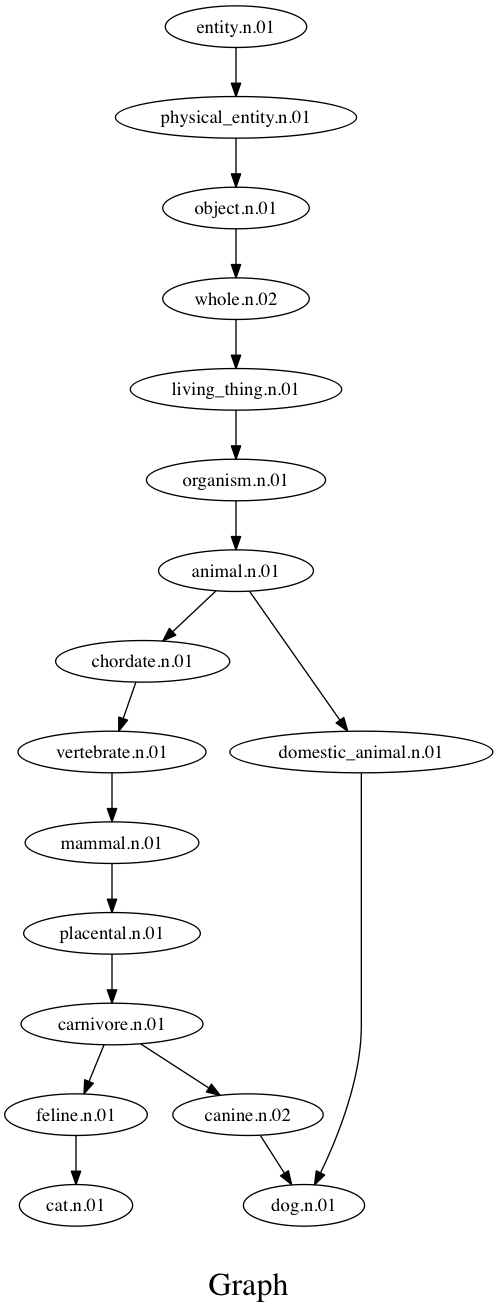

In [5]:
s1 = wn.synset('cat.n.1')
s2 = wn.synset('dog.n.1')


NIdV = snap.TIntV()
synset_ids = set()

S = snap.TIntStrH()

for target_synset in [s1, s2]:
    for hypernym_path in target_synset.hypernym_paths():
        for synset in hypernym_path:
            offset = synset.offset()
            if offset not in synset_ids:
                NIdV.Add(synset.offset())
                synset_ids.add(offset)
                
                # add labels
                S.AddDat(offset, synset.name())

subgraph = snap.GetSubGraph(g, NIdV)
snap.DrawGViz(subgraph, snap.gvlDot, "gviz.png", "Graph", 
              S
              )
print('shortest path', snap.GetShortPath(subgraph, s1.offset(), s2.offset()))
Image(filename='gviz.png')

## example sentence
```
Our fleet comprises coaches from 35 to 58 seats.
```

In [6]:
content_words = {1 : ('fleet', 'n'),
                 2:  ('comprise', 'v'),
                 3:  ('coach', 'n'),
                 4:  ('seat', 'n')}

nodes_to_disambiguate = content_words.keys()
nodes2candidates = dict()
for node, (lemma, pos) in content_words.items():
    nodes2candidates[node] = {synset.offset()
                                      for synset in wn.synsets(lemma, pos=pos)}

#### add nodes to the graph

In [7]:
for node, (lemma, pos) in content_words.items():
    g.AddNode(node)
    
    for candidate in nodes2candidates[node]:
        g.AddEdge(candidate, node)

In [8]:
nodes_added = g.GetNodes() - default_num_nodes 
nodes_added

4

In [9]:
edges_added = g.GetEdges() - default_num_edges
edges_added

21